In [ ]:
##Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

# Create/Clean dataframes for each record

In [2]:
cle = pd.read_csv('processed.cleveland.data', header=None)
va = pd.read_csv('processed.va.data', header=None)
sw = pd.read_csv('processed.switzerland.data', header=None)
hu = pd.read_csv('processed.hungarian.data', header=None)

In [3]:
va.describe()

,0,1,2,6,13
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [4]:
sw.describe()

,0,1,2,4,13
count,123.000000,123.000000,123.000000,123.0,123.000000
mean,55.317073,0.918699,3.699187,0.0,1.804878
std,9.032108,0.274414,0.688726,0.0,1.013503
min,32.000000,0.000000,1.000000,0.0,0.000000
25%,51.000000,1.000000,4.000000,0.0,1.000000
50%,56.000000,1.000000,4.000000,0.0,2.000000
75%,61.500000,1.000000,4.000000,0.0,3.000000
max,74.000000,1.000000,4.000000,0.0,4.000000


In [5]:
hu.describe()

,0,1,2,9,13
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [6]:
cle.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Assign Column Names

In [7]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
         'ca', 'thal']
cle.columns = names + ['target']
va.columns = names + ['target']
hu.columns = names + ['target']
sw.columns = names + ['target']

In [8]:
cle.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Clean the data
Replace all nonNumeric values with NaN  
Use KNN Impute to fill the rest of the values

#### Cleveland dataset

In [9]:
cle.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
for name in names:
    print(name, ": ", cle[name].dtype)

age :  float64
sex :  float64
cp :  float64
trestbps :  float64
chol :  float64
fbs :  float64
restecg :  float64
thalach :  float64
exang :  float64
oldpeak :  float64
slope :  float64
ca :  object
thal :  object


In [11]:
numbers = pd.to_numeric(cle['ca'], errors='coerce')
ca_nonNum = cle[numbers.isna()]
print(ca_nonNum['ca'])

166    ?
192    ?
287    ?
302    ?
Name: ca, dtype: object


In [12]:
thal_vals = pd.to_numeric(cle['thal'], errors='coerce')
thal_nonNum = cle[thal_vals.isna()]
print(thal_nonNum['thal'])

87     ?
266    ?
Name: thal, dtype: object


Only represents 1.98% of data points => drop rows

In [13]:
cle = cle.replace('?', np.nan)

In [14]:
for name in names:
    missing_sum = cle[name].isna().sum()
    print(name, ": ", cle[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  float64
Sum of missing values in  trestbps :  0
chol :  float64
Sum of missing values in  chol :  0
fbs :  float64
Sum of missing values in  fbs :  0
restecg :  float64
Sum of missing values in  restecg :  0
thalach :  float64
Sum of missing values in  thalach :  0
exang :  float64
Sum of missing values in  exang :  0
oldpeak :  float64
Sum of missing values in  oldpeak :  0
slope :  float64
Sum of missing values in  slope :  0
ca :  object
Sum of missing values in  ca :  4
thal :  object
Sum of missing values in  thal :  2


In [15]:
cle = cle.dropna()

#### VA Dataset

In [16]:
va.describe()

,age,sex,cp,restecg,target
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [17]:
for name in names:
    print(name, ": ", va[name].dtype)

age :  int64
sex :  int64
cp :  int64
trestbps :  object
chol :  object
fbs :  object
restecg :  int64
thalach :  object
exang :  object
oldpeak :  object
slope :  object
ca :  object
thal :  object


Investigate missing values in:
trestbps
chol
fbs
thalach
exang
oldpeak
slope
ca
thal

In [18]:
missing_vals = ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for col in missing_vals:
    numbers = pd.to_numeric(va[col], errors='coerce')
    va_nonNum = va[numbers.isna()]
    print(col, "missing vals: ", len(va_nonNum))
    print(va_nonNum[col])
    print("")


trestbps missing vals:  56
13     ?
23     ?
26     ?
29     ?
30     ?
36     ?
38     ?
42     ?
44     ?
48     ?
51     ?
57     ?
58     ?
60     ?
68     ?
69     ?
72     ?
77     ?
87     ?
89     ?
94     ?
96     ?
109    ?
110    ?
111    ?
112    ?
113    ?
114    ?
115    ?
119    ?
120    ?
124    ?
129    ?
133    ?
136    ?
137    ?
141    ?
142    ?
144    ?
145    ?
147    ?
149    ?
155    ?
158    ?
159    ?
160    ?
161    ?
163    ?
164    ?
167    ?
168    ?
174    ?
181    ?
185    ?
196    ?
198    ?
Name: trestbps, dtype: object

chol missing vals:  7
107    ?
125    ?
155    ?
157    ?
164    ?
165    ?
181    ?
Name: chol, dtype: object

fbs missing vals:  7
8      ?
49     ?
56     ?
61     ?
62     ?
65     ?
102    ?
Name: fbs, dtype: object

thalach missing vals:  53
13     ?
23     ?
26     ?
29     ?
30     ?
36     ?
38     ?
44     ?
51     ?
57     ?
58     ?
60     ?
68     ?
69     ?
72     ?
77     ?
87     ?
89     ?
94     ?
96     ?
109    ?
1

Drop columns missing >50% of data

In [19]:
va = va.drop(['slope', 'ca', 'thal'], axis = 1)
va = va.replace('?', np.nan)

In [20]:
for name in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak']:
    missing_sum = va[name].isna().sum()
    print(name, ": ", va[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  int64
Sum of missing values in  age :  0
sex :  int64
Sum of missing values in  sex :  0
cp :  int64
Sum of missing values in  cp :  0
trestbps :  object
Sum of missing values in  trestbps :  56
chol :  object
Sum of missing values in  chol :  7
fbs :  object
Sum of missing values in  fbs :  7
restecg :  int64
Sum of missing values in  restecg :  0
thalach :  object
Sum of missing values in  thalach :  53
exang :  object
Sum of missing values in  exang :  53
oldpeak :  object
Sum of missing values in  oldpeak :  56


Use KNN Imputation to fill in rest of the values

In [21]:
print(56+7+7+53+53+56)

232


In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [23]:
X = va.drop(columns='target')
y = va['target']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_scaled), columns=X.columns)

X_final = pd.DataFrame(scaler.inverse_transform(X_imputed), columns=X.columns)

va_imputed = pd.concat([X_final, y.reset_index(drop=True)], axis=1)
for name in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak']:
    missing_sum = va_imputed[name].isna().sum()
    print(name, ": ", va_imputed[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  float64
Sum of missing values in  trestbps :  0
chol :  float64
Sum of missing values in  chol :  0
fbs :  float64
Sum of missing values in  fbs :  0
restecg :  float64
Sum of missing values in  restecg :  0
thalach :  float64
Sum of missing values in  thalach :  0
exang :  float64
Sum of missing values in  exang :  0
oldpeak :  float64
Sum of missing values in  oldpeak :  0


In [25]:
va = va_imputed

#### Hungary Dataset

In [26]:
hu.describe()

,age,sex,cp,oldpeak,target
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [27]:
for name in names:
    print(name, ": ", hu[name].dtype)

age :  int64
sex :  int64
cp :  int64
trestbps :  object
chol :  object
fbs :  object
restecg :  object
thalach :  object
exang :  object
oldpeak :  float64
slope :  object
ca :  object
thal :  object


In [28]:
missing_vals = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']
for col in missing_vals:
    numbers = pd.to_numeric(hu[col], errors='coerce')
    hu_nonNum = hu[numbers.isna()]
    print(col, "missing vals: ", len(hu_nonNum))
    print(hu_nonNum[col])
    print("")

trestbps missing vals:  1
90    ?
Name: trestbps, dtype: object

chol missing vals:  23
2      ?
31     ?
34     ?
44     ?
65     ?
72     ?
75     ?
86     ?
91     ?
97     ?
101    ?
102    ?
108    ?
124    ?
134    ?
154    ?
168    ?
182    ?
226    ?
239    ?
244    ?
275    ?
278    ?
Name: chol, dtype: object

fbs missing vals:  8
27     ?
81     ?
107    ?
131    ?
144    ?
166    ?
197    ?
199    ?
Name: fbs, dtype: object

restecg missing vals:  1
268    ?
Name: restecg, dtype: object

thalach missing vals:  1
90    ?
Name: thalach, dtype: object

exang missing vals:  1
90    ?
Name: exang, dtype: object

slope missing vals:  190
0      ?
1      ?
2      ?
3      ?
4      ?
      ..
275    ?
276    ?
281    ?
284    ?
289    ?
Name: slope, Length: 190, dtype: object

ca missing vals:  291
0      ?
1      ?
2      ?
3      ?
4      ?
      ..
289    ?
290    ?
291    ?
292    ?
293    ?
Name: ca, Length: 291, dtype: object

thal missing vals:  266
0      ?
1      ?
2      

In [29]:
hu = hu.drop(['slope', 'ca', 'thal'], axis = 1)
hu = hu.replace('?', np.nan)

In [30]:
for name in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak']:
    missing_sum = hu[name].isna().sum()
    print(name, ": ", hu[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  int64
Sum of missing values in  age :  0
sex :  int64
Sum of missing values in  sex :  0
cp :  int64
Sum of missing values in  cp :  0
trestbps :  object
Sum of missing values in  trestbps :  1
chol :  object
Sum of missing values in  chol :  23
fbs :  object
Sum of missing values in  fbs :  8
restecg :  object
Sum of missing values in  restecg :  1
thalach :  object
Sum of missing values in  thalach :  1
exang :  object
Sum of missing values in  exang :  1
oldpeak :  float64
Sum of missing values in  oldpeak :  0


In [31]:
print(1+23+8+1+1+1)

35


KNN Imputation

In [32]:
X = hu.drop(columns='target')
y = hu['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_scaled), columns=X.columns)

X_final = pd.DataFrame(scaler.inverse_transform(X_imputed), columns=X.columns)

hu_imputed = pd.concat([X_final, y.reset_index(drop=True)], axis=1)

In [33]:
for name in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak']:
    missing_sum = hu_imputed[name].isna().sum()
    print(name, ": ", hu_imputed[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  float64
Sum of missing values in  trestbps :  0
chol :  float64
Sum of missing values in  chol :  0
fbs :  float64
Sum of missing values in  fbs :  0
restecg :  float64
Sum of missing values in  restecg :  0
thalach :  float64
Sum of missing values in  thalach :  0
exang :  float64
Sum of missing values in  exang :  0
oldpeak :  float64
Sum of missing values in  oldpeak :  0


In [34]:
hu = hu_imputed

#### Switzerland Dataset

In [35]:
for name in names:
    print(name, ": ", sw[name].dtype)

age :  int64
sex :  int64
cp :  int64
trestbps :  object
chol :  int64
fbs :  object
restecg :  object
thalach :  object
exang :  object
oldpeak :  object
slope :  object
ca :  object
thal :  object


In [36]:
missing_vals = ['trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for col in missing_vals:
    numbers = pd.to_numeric(sw[col], errors='coerce')
    sw_nonNum = sw[numbers.isna()]
    print(col, "missing vals: ", len(sw_nonNum))
    print(sw_nonNum[col])
    print("")

trestbps missing vals:  2
2      ?
117    ?
Name: trestbps, dtype: object

fbs missing vals:  75
0      ?
1      ?
2      ?
3      ?
4      ?
      ..
109    ?
111    ?
115    ?
120    ?
122    ?
Name: fbs, Length: 75, dtype: object

restecg missing vals:  1
1    ?
Name: restecg, dtype: object

thalach missing vals:  1
117    ?
Name: thalach, dtype: object

exang missing vals:  1
117    ?
Name: exang, dtype: object

oldpeak missing vals:  6
2      ?
9      ?
39     ?
108    ?
110    ?
117    ?
Name: oldpeak, dtype: object

slope missing vals:  17
2      ?
8      ?
9      ?
20     ?
25     ?
33     ?
39     ?
43     ?
66     ?
71     ?
73     ?
83     ?
92     ?
108    ?
110    ?
111    ?
117    ?
Name: slope, dtype: object

ca missing vals:  118
0      ?
1      ?
2      ?
3      ?
4      ?
      ..
117    ?
118    ?
119    ?
121    ?
122    ?
Name: ca, Length: 118, dtype: object

thal missing vals:  52
0      ?
1      ?
4      ?
6      ?
10     ?
11     ?
12     ?
13     ?
14     ?
17 

In [37]:
sw = sw.drop(['fbs', 'ca', 'thal'], axis = 1)
sw = sw.replace('?', np.nan)

In [38]:
for name in ['age', 'sex', 'cp', 'trestbps', 'chol',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope']:
    missing_sum = sw[name].isna().sum()
    print(name, ": ", sw[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  int64
Sum of missing values in  age :  0
sex :  int64
Sum of missing values in  sex :  0
cp :  int64
Sum of missing values in  cp :  0
trestbps :  object
Sum of missing values in  trestbps :  2
chol :  int64
Sum of missing values in  chol :  0
restecg :  object
Sum of missing values in  restecg :  1
thalach :  object
Sum of missing values in  thalach :  1
exang :  object
Sum of missing values in  exang :  1
oldpeak :  object
Sum of missing values in  oldpeak :  6
slope :  object
Sum of missing values in  slope :  17


In [39]:
sw.describe()

,age,sex,cp,chol,target
count,123.000000,123.000000,123.000000,123.0,123.000000
mean,55.317073,0.918699,3.699187,0.0,1.804878
std,9.032108,0.274414,0.688726,0.0,1.013503
min,32.000000,0.000000,1.000000,0.0,0.000000
25%,51.000000,1.000000,4.000000,0.0,1.000000
50%,56.000000,1.000000,4.000000,0.0,2.000000
75%,61.500000,1.000000,4.000000,0.0,3.000000
max,74.000000,1.000000,4.000000,0.0,4.000000


KNN Imputation

In [40]:
X = sw.drop(columns='target')
y = sw['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_scaled), columns=X.columns)

X_final = pd.DataFrame(scaler.inverse_transform(X_imputed), columns=X.columns)

sw_imputed = pd.concat([X_final, y.reset_index(drop=True)], axis=1)

In [41]:
for name in ['age', 'sex', 'cp', 'trestbps', 'chol',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope']:
    missing_sum = sw_imputed[name].isna().sum()
    print(name, ": ", sw_imputed[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  float64
Sum of missing values in  trestbps :  0
chol :  float64
Sum of missing values in  chol :  0
restecg :  float64
Sum of missing values in  restecg :  0
thalach :  float64
Sum of missing values in  thalach :  0
exang :  float64
Sum of missing values in  exang :  0
oldpeak :  float64
Sum of missing values in  oldpeak :  0
slope :  float64
Sum of missing values in  slope :  0


In [42]:
sw = sw.drop('chol', axis=1)

In [43]:
sw

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,target
0,32,1,1,95,0,127,0,.7,1,1
1,34,1,4,115,NaN,154,0,.2,1,1
2,35,1,4,NaN,0,130,1,NaN,NaN,3
3,36,1,4,110,0,125,1,1,2,1
4,38,0,4,105,0,166,0,2.8,1,2
...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,1,92,1,0,2,1
119,70,1,4,140,0,157,1,2,2,3
120,72,1,3,160,2,114,0,1.6,2,0
121,73,0,3,160,1,121,0,0,1,1


# View Correlations

In [44]:
cle.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


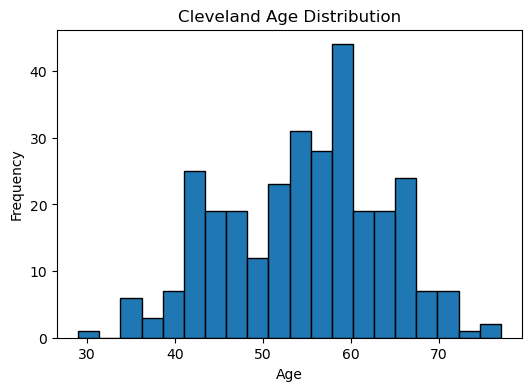

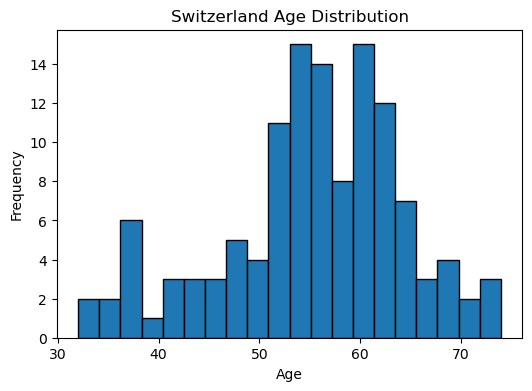

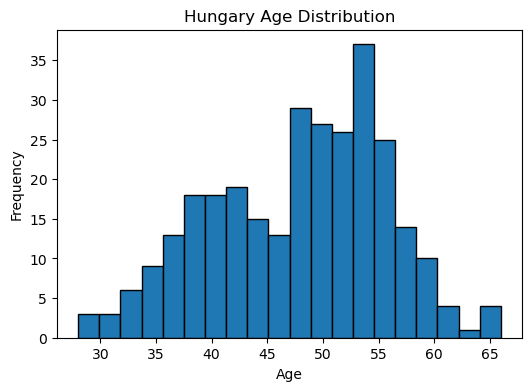

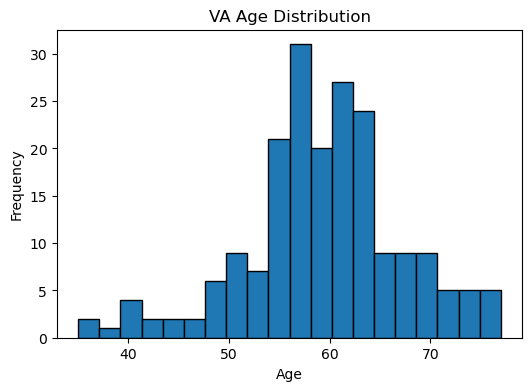

In [45]:
datasets = [('Cleveland', cle), ('Switzerland', sw), ('Hungary', hu), ('VA', va)]

for name, df in datasets:
    plt.figure(figsize=(6, 4))
    plt.hist(df['age'], bins=20, edgecolor='black')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title(f'{name} Age Distribution')
    plt.show()

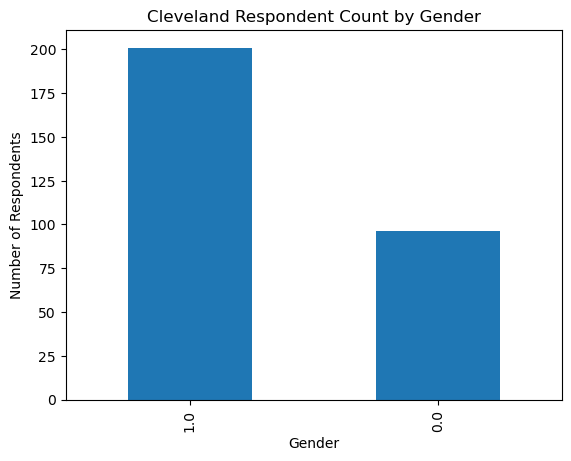

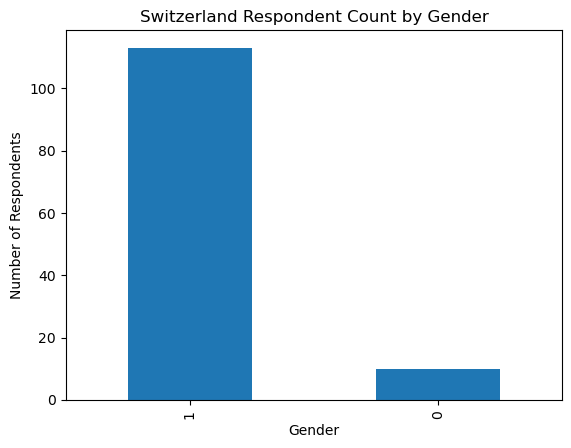

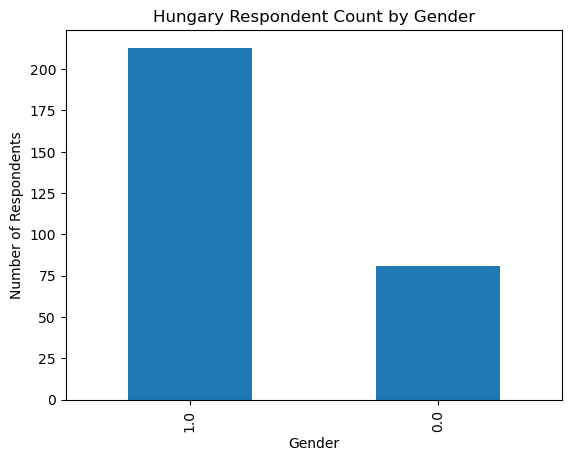

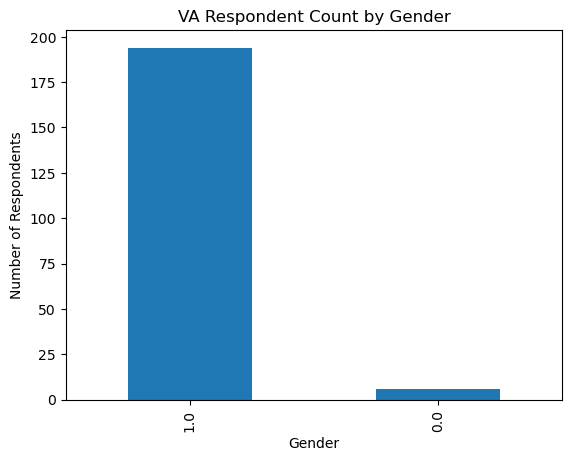

In [46]:
for name, df in datasets:
    counts = df['sex'].value_counts()
    counts.plot(kind='bar')
    plt.xlabel('Gender')
    plt.ylabel('Number of Respondents')
    plt.title(f'{name} Respondent Count by Gender')
    plt.show()

### Correlation Matrix

In [74]:
# Compute correlation matrix
correlation_matrix = cle.corr(numeric_only=True)


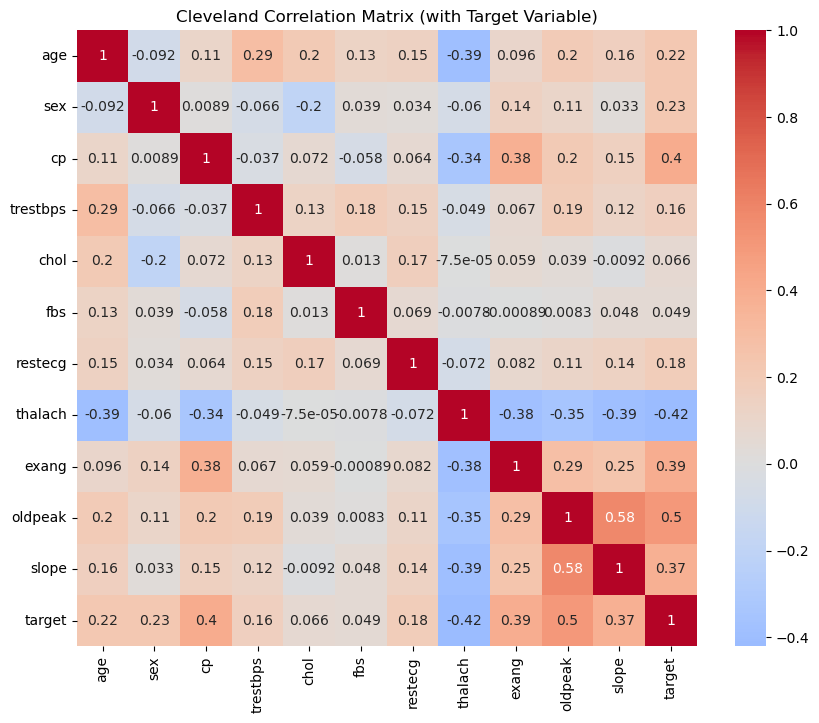

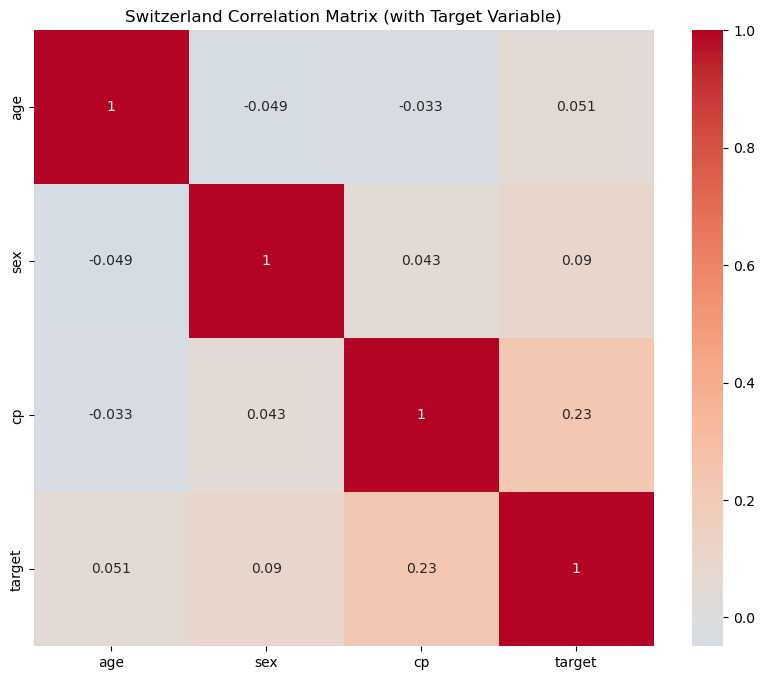

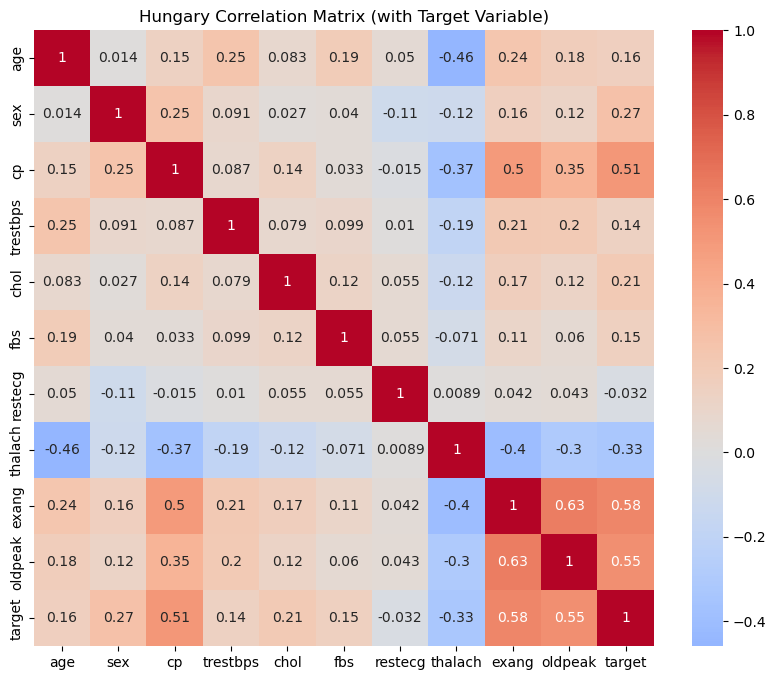

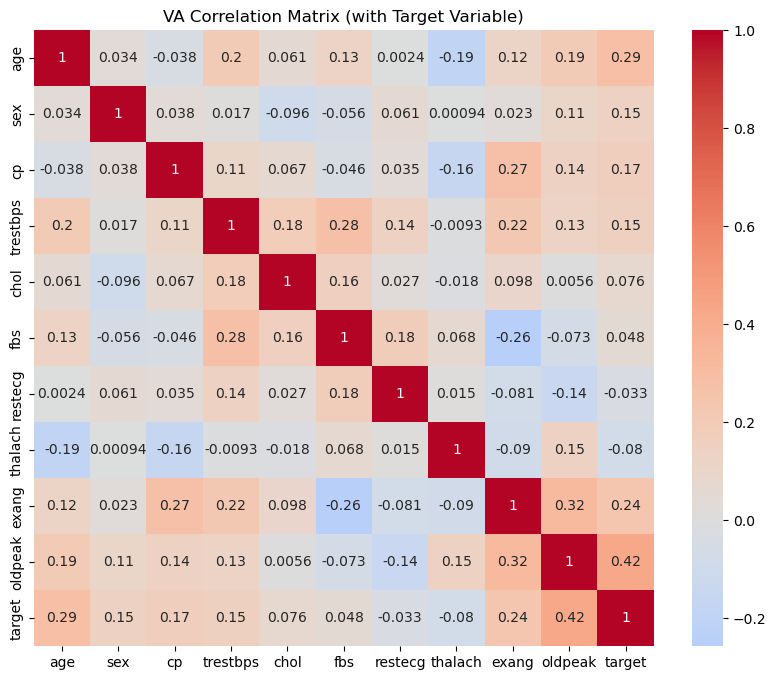

In [48]:
datasets = [('Cleveland', cle), ('Switzerland', sw), ('Hungary', hu), ('VA', va)]
for name, df in datasets:
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{name} Correlation Matrix (with Target Variable)')
    plt.show()

### Pairplot

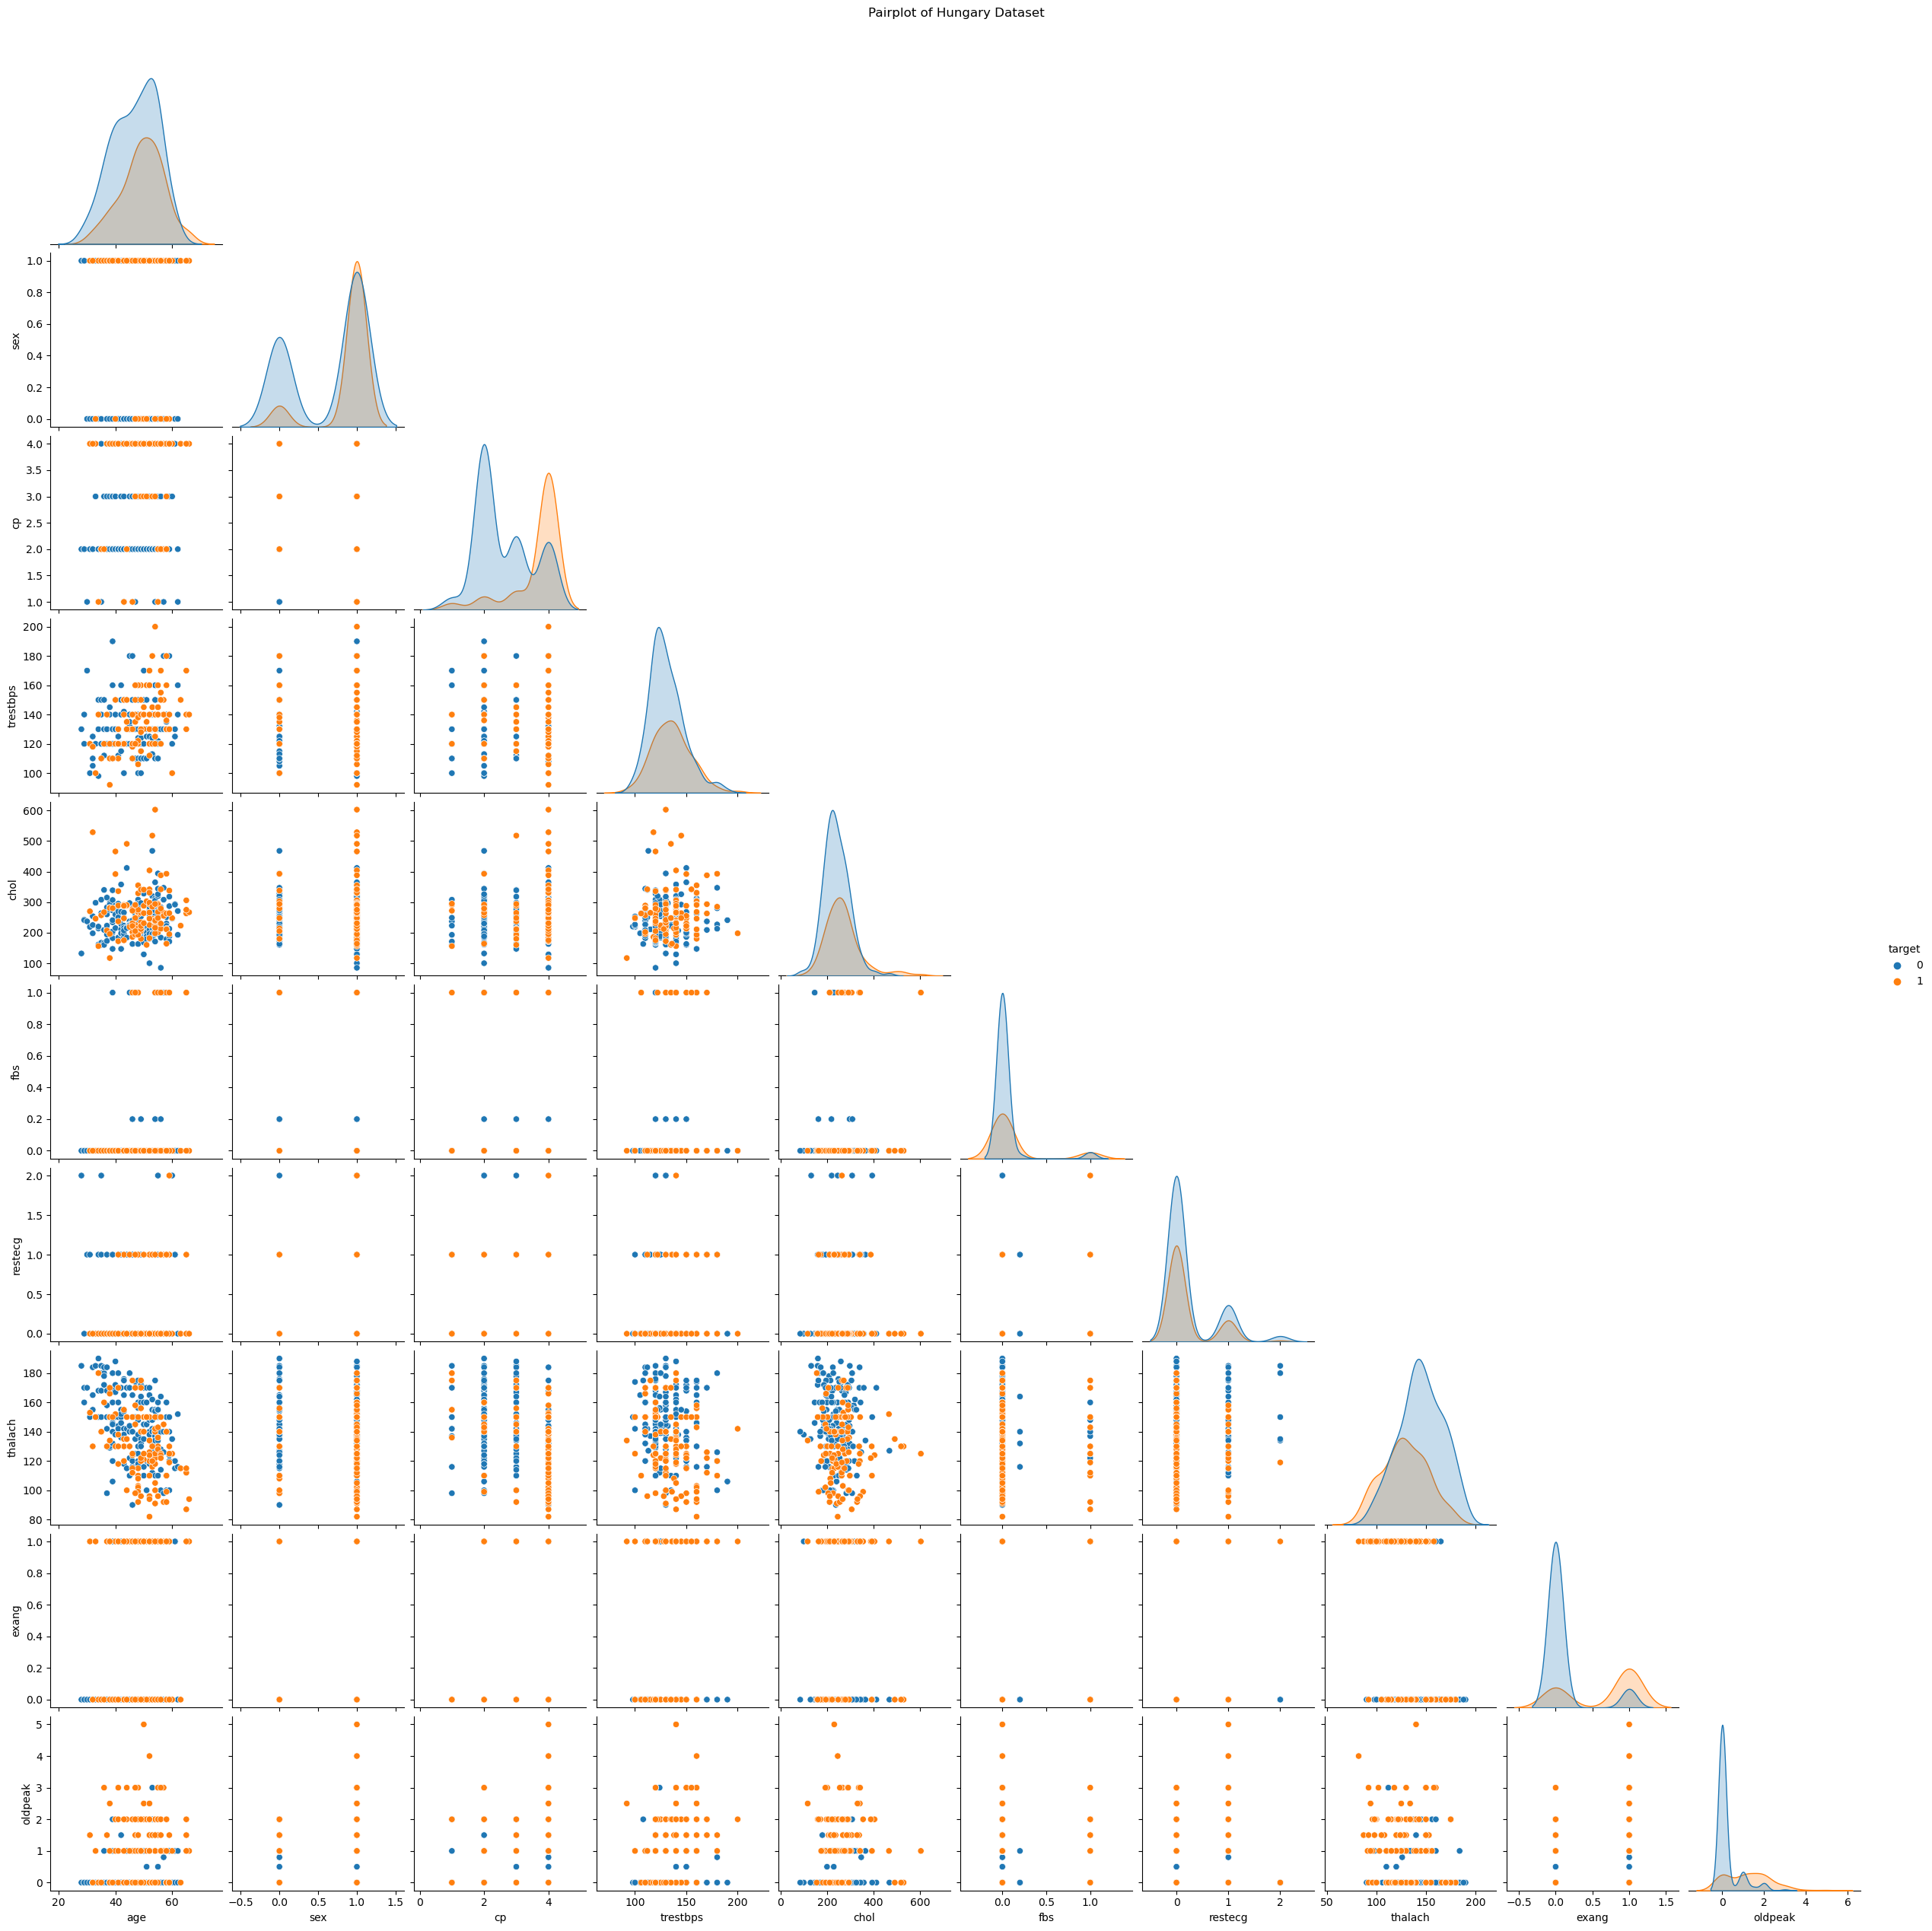

In [49]:
sns.pairplot(hu, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Hungary Dataset', y=1.02)  # Title with padding
plt.show()

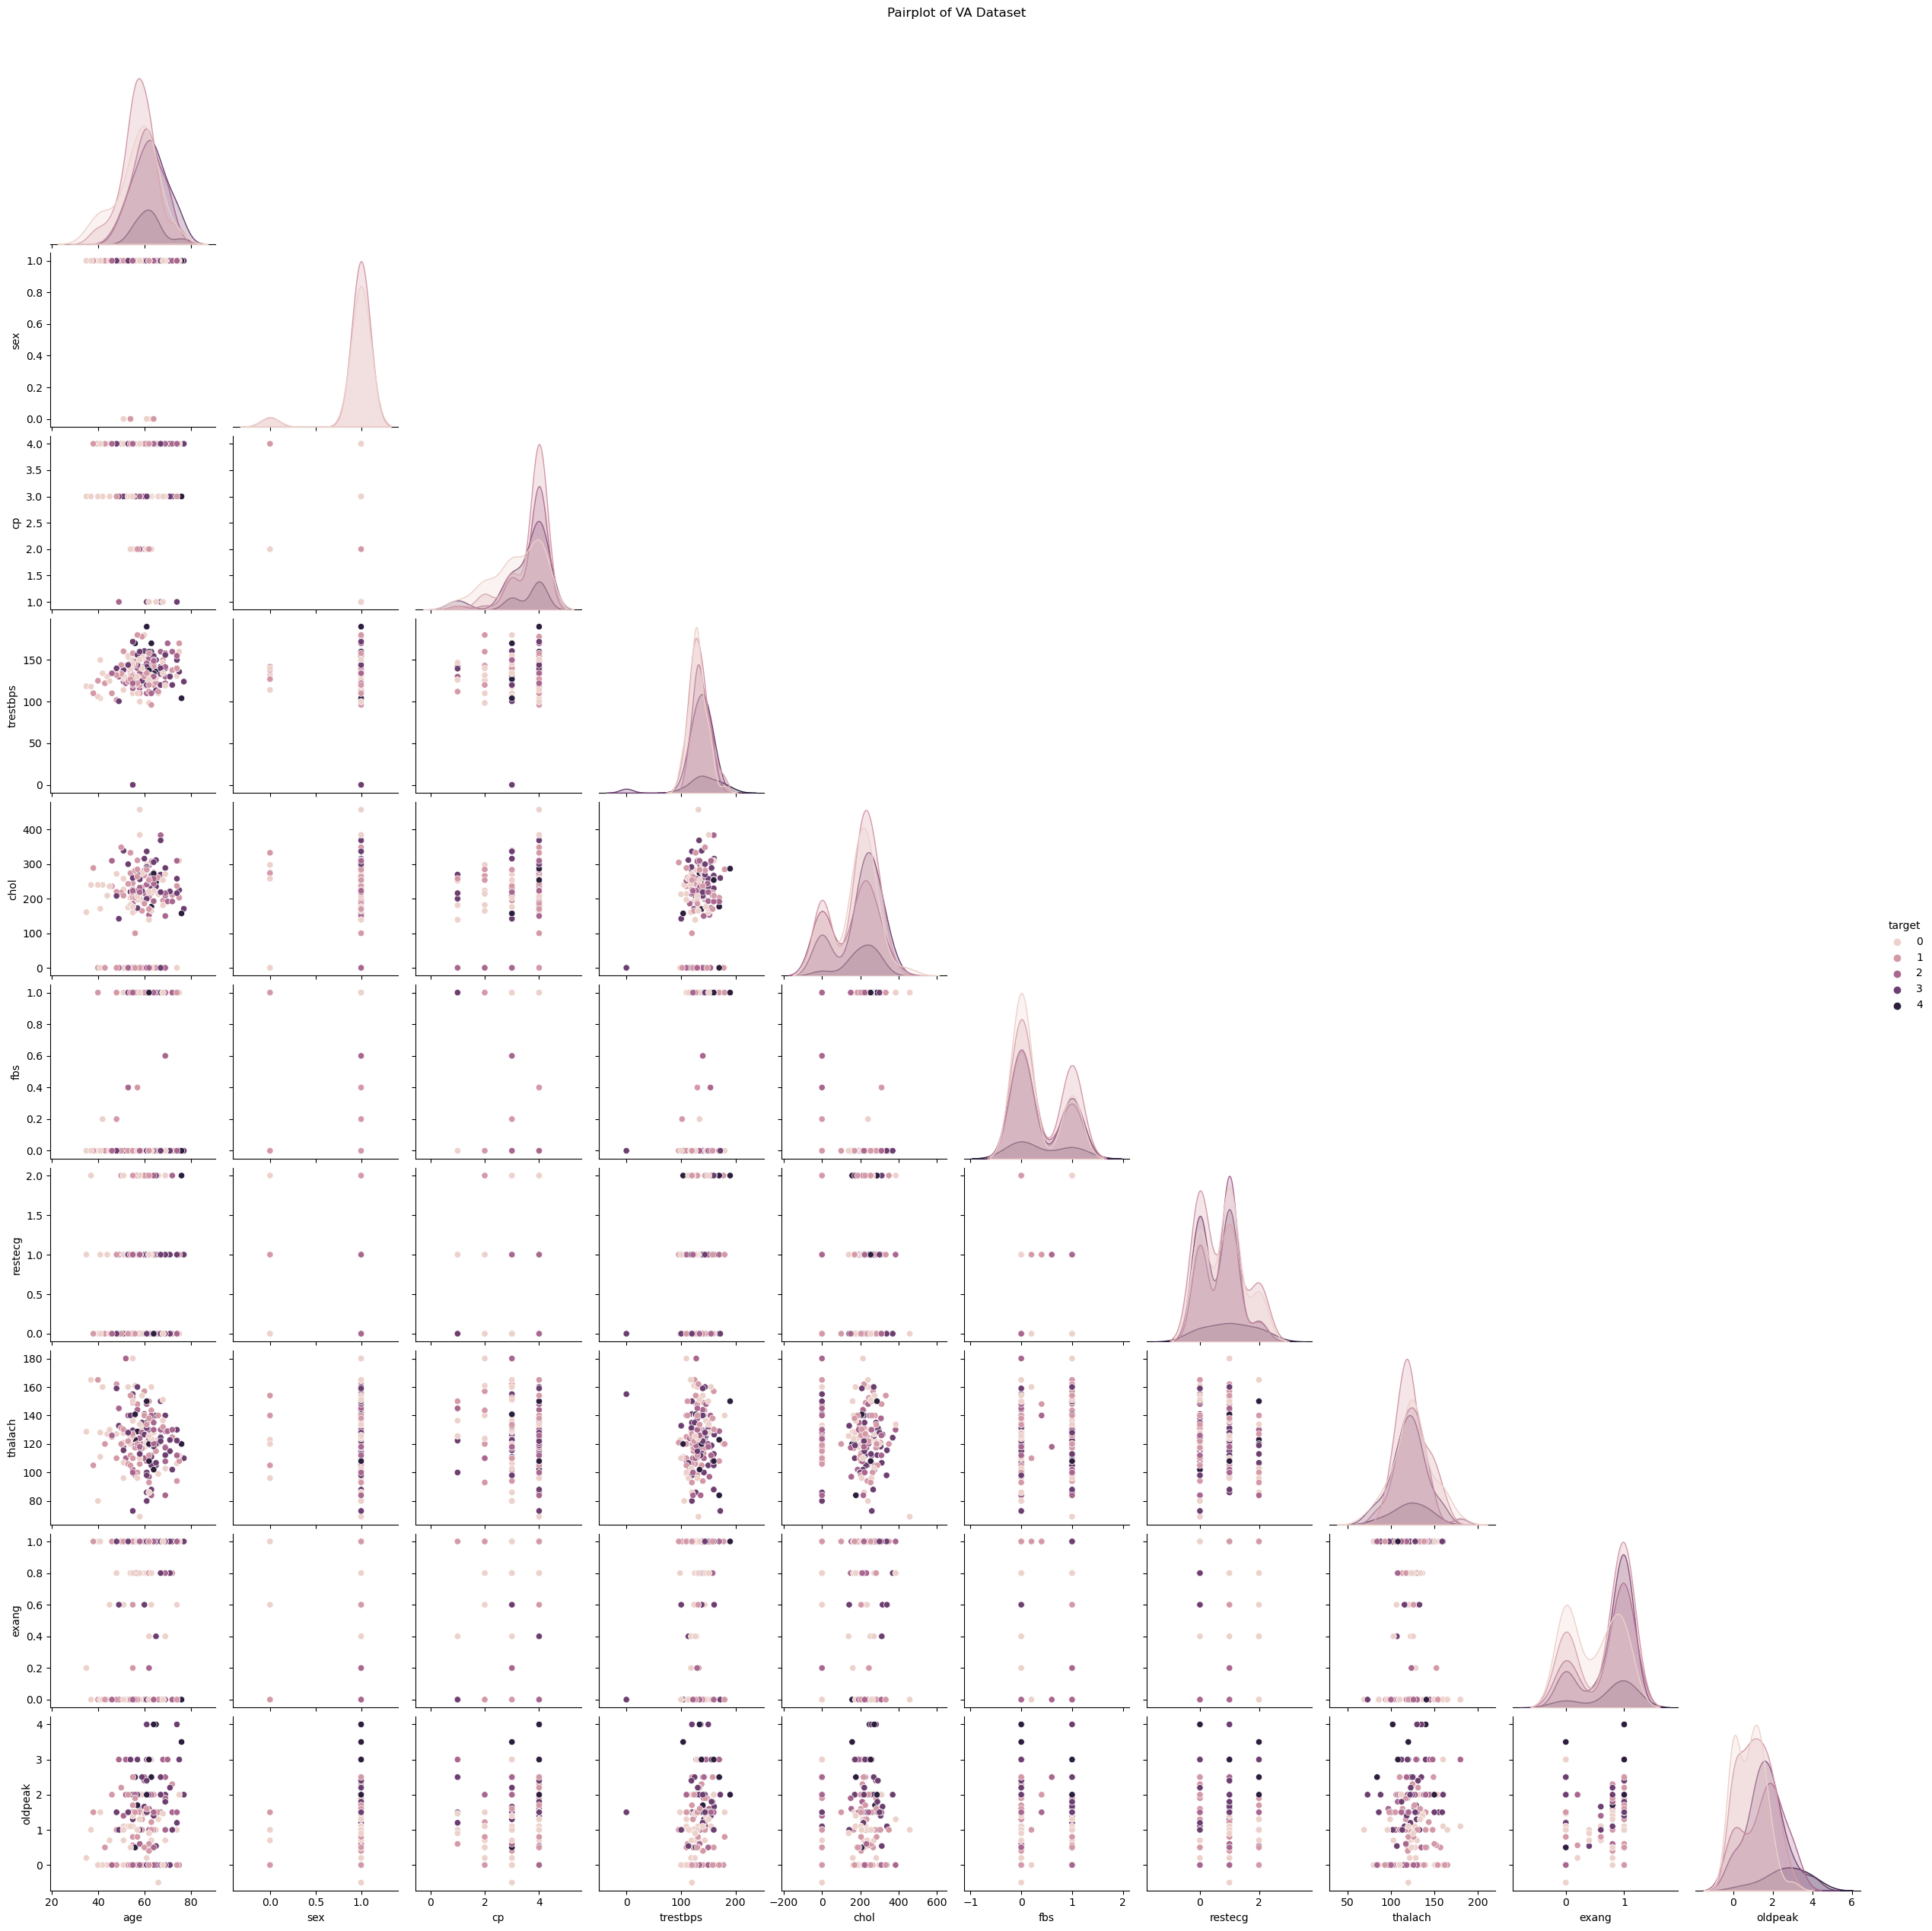

In [50]:
sns.pairplot(va, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of VA Dataset', y=1.02)  # Title with padding
plt.show()

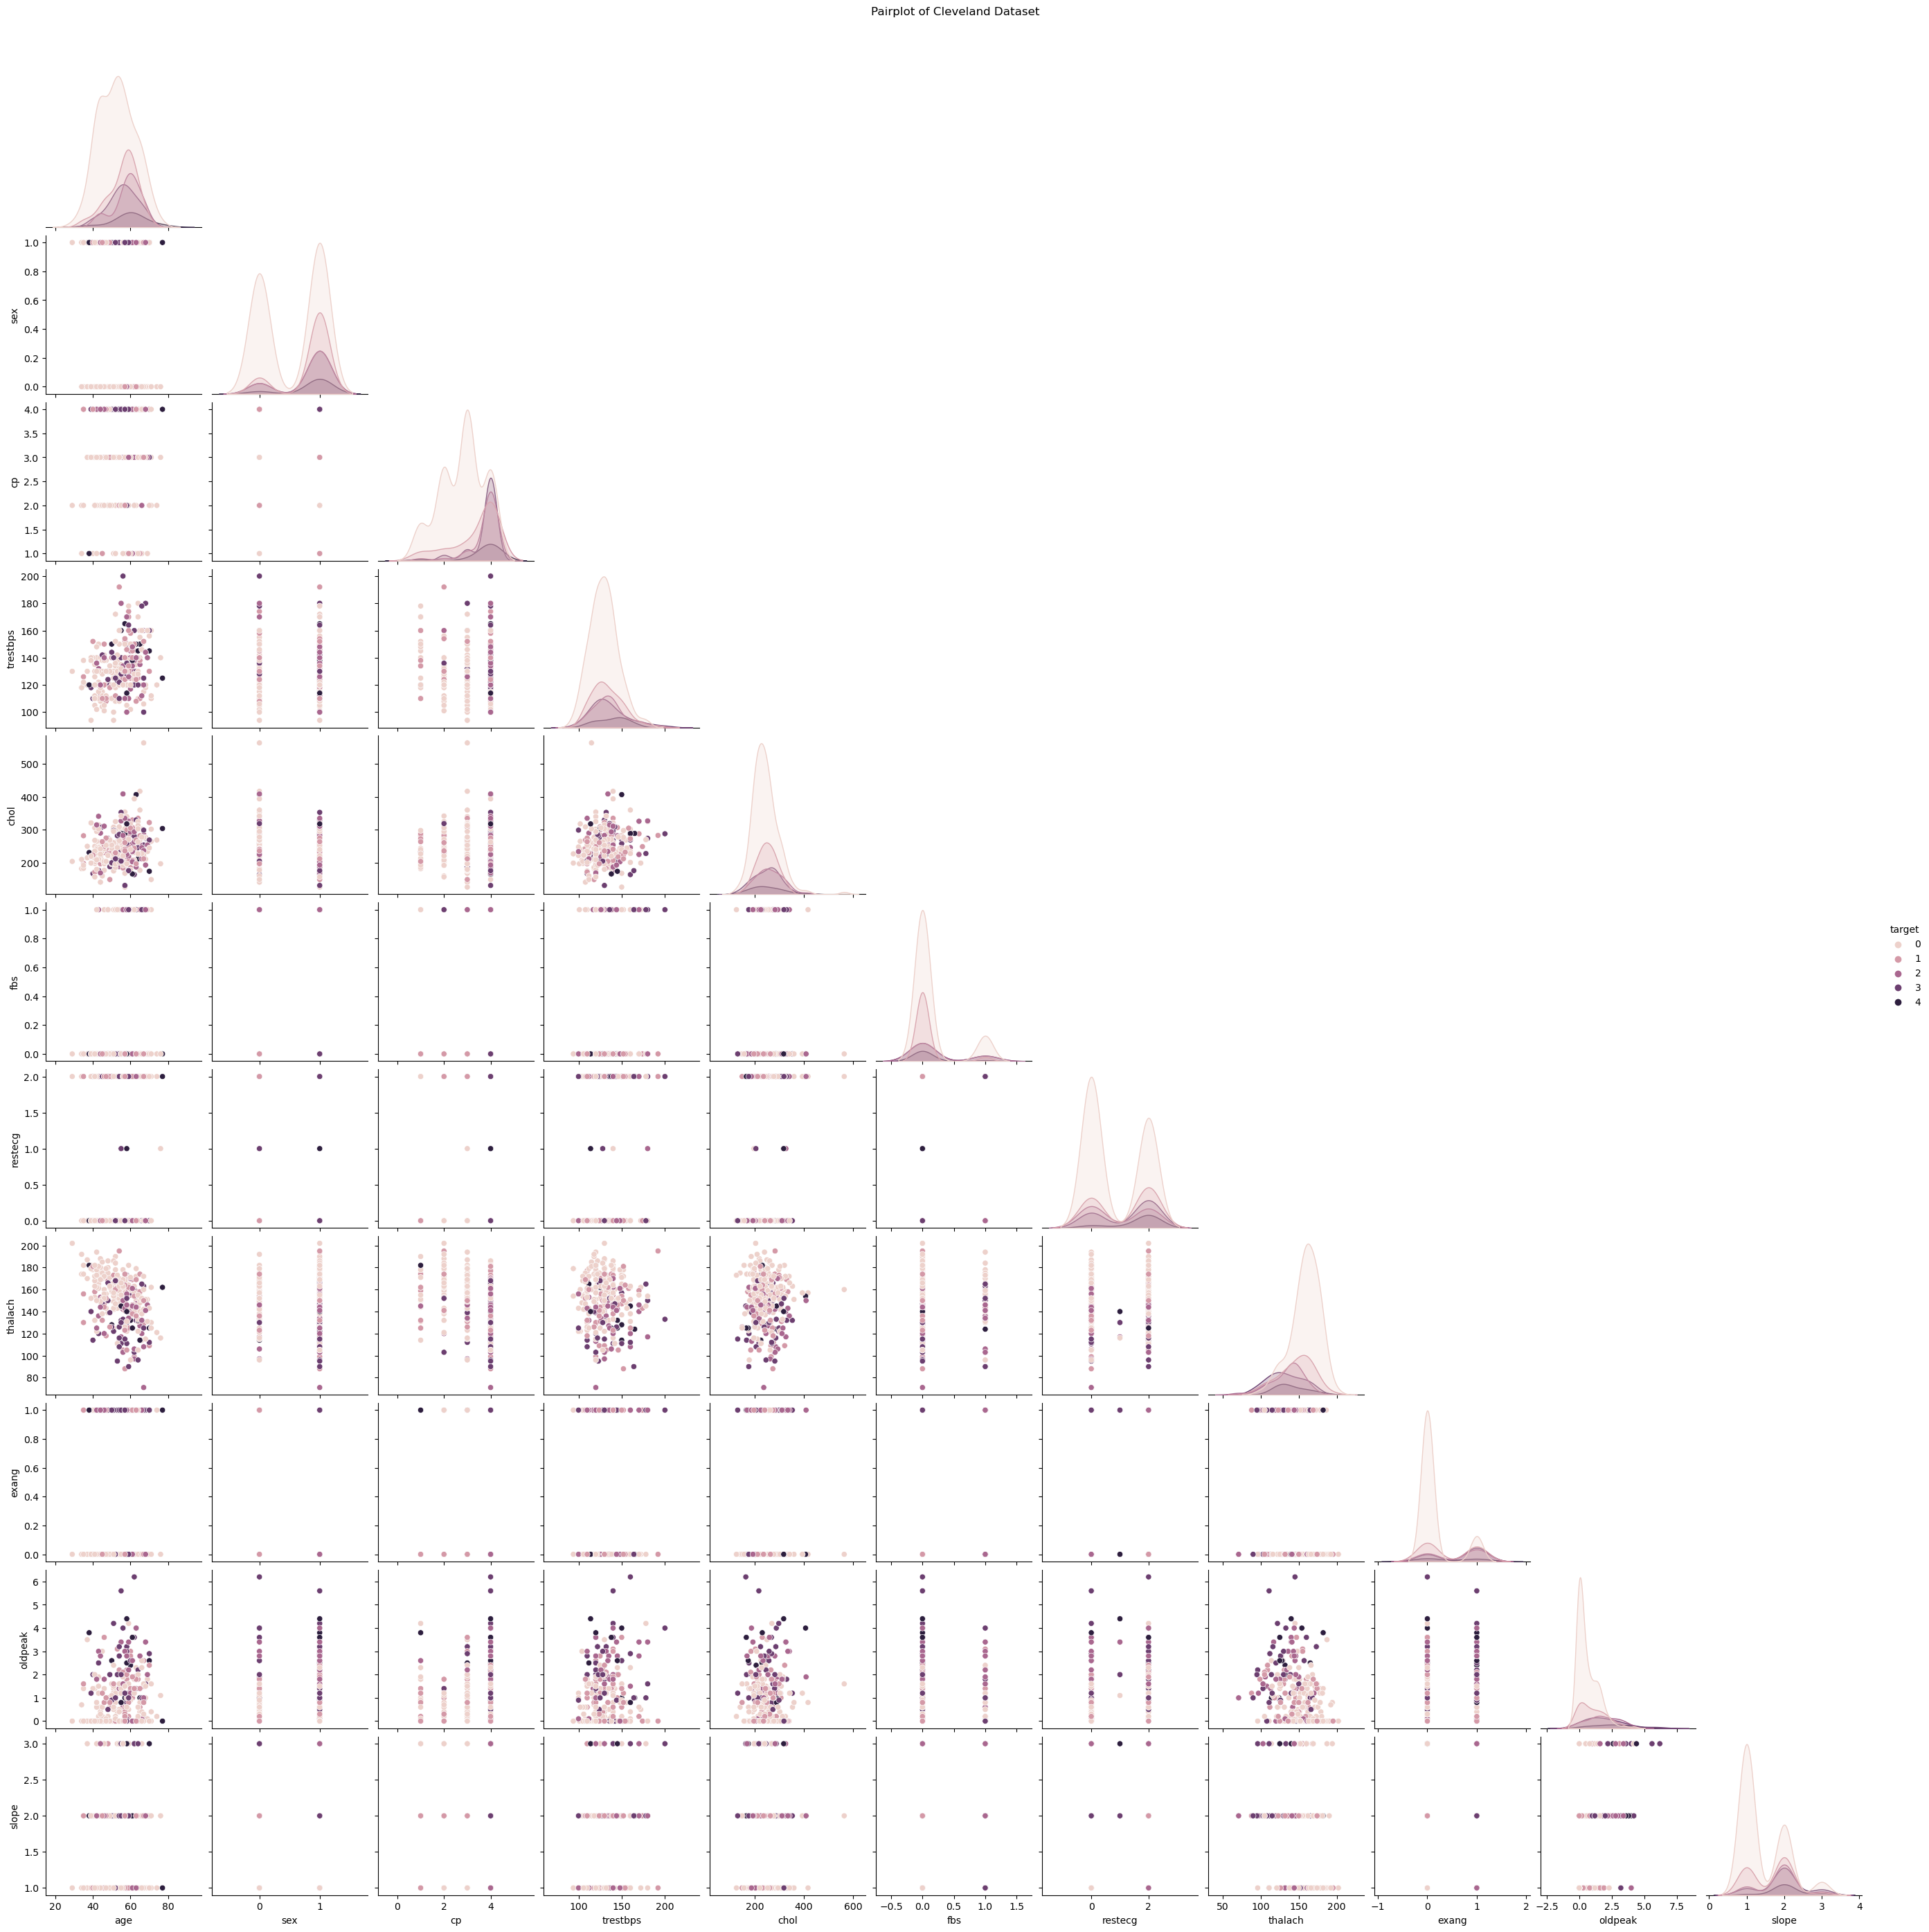

In [51]:
sns.pairplot(cle, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Cleveland Dataset', y=1.02)  # Title with padding
plt.show()

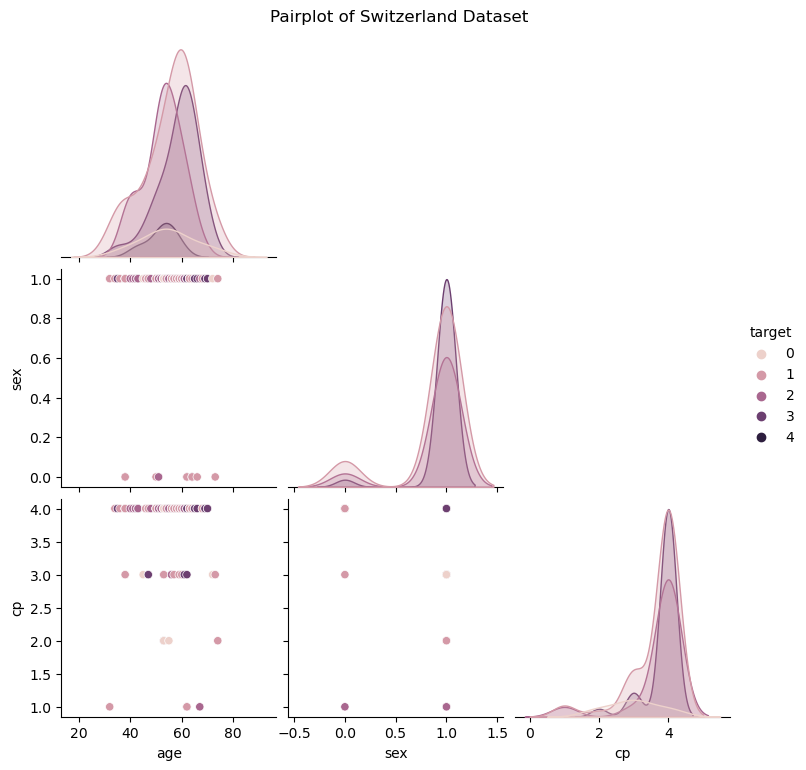

In [52]:
sns.pairplot(sw, hue='target', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Switzerland Dataset', y=1.02)  # Title with padding
plt.show()

# Evaluating Models

### Create master dataset

In [53]:
cle1 = pd.read_csv('processed.cleveland.data', header=None)
va1 = pd.read_csv('processed.va.data', header=None)
sw1 = pd.read_csv('processed.switzerland.data', header=None)
hu1 = pd.read_csv('processed.hungarian.data', header=None)

In [54]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
         'ca', 'thal']
cle1.columns = names + ['target']
va1.columns = names + ['target']
hu1.columns = names + ['target']
sw1.columns = names + ['target']

sw1 = sw1.drop('chol', axis=1)

In [55]:
merged = pd.concat([cle1, sw1, hu1, va1],
                   axis=0,         
                   join='outer',    
                   ignore_index=True,
                   sort=False)    

merged = merged.replace('?', np.nan)
merged['target'] = (merged['target'] > 0).astype(int)

In [56]:
for name in names:
    missing_sum = merged[name].isna().sum()
    print(name, ": ", merged[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  object
Sum of missing values in  trestbps :  59
chol :  object
Sum of missing values in  chol :  153
fbs :  object
Sum of missing values in  fbs :  90
restecg :  object
Sum of missing values in  restecg :  2
thalach :  object
Sum of missing values in  thalach :  55
exang :  object
Sum of missing values in  exang :  55
oldpeak :  object
Sum of missing values in  oldpeak :  62
slope :  object
Sum of missing values in  slope :  309
ca :  object
Sum of missing values in  ca :  611
thal :  object
Sum of missing values in  thal :  486


In [57]:
X = merged.drop(columns='target')
y = merged['target']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [58]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_scaled), columns=X.columns)

X_final = pd.DataFrame(scaler.inverse_transform(X_imputed), columns=X.columns)

merged_imputed = pd.concat([X_final, y.reset_index(drop=True)], axis=1)

In [59]:
for name in names:
    missing_sum = merged_imputed[name].isna().sum()
    print(name, ": ", merged_imputed[name].dtype)
    print("Sum of missing values in ", name, ": ", missing_sum)

age :  float64
Sum of missing values in  age :  0
sex :  float64
Sum of missing values in  sex :  0
cp :  float64
Sum of missing values in  cp :  0
trestbps :  float64
Sum of missing values in  trestbps :  0
chol :  float64
Sum of missing values in  chol :  0
fbs :  float64
Sum of missing values in  fbs :  0
restecg :  float64
Sum of missing values in  restecg :  0
thalach :  float64
Sum of missing values in  thalach :  0
exang :  float64
Sum of missing values in  exang :  0
oldpeak :  float64
Sum of missing values in  oldpeak :  0
slope :  float64
Sum of missing values in  slope :  0
ca :  float64
Sum of missing values in  ca :  0
thal :  float64
Sum of missing values in  thal :  0


In [60]:
merged = merged_imputed

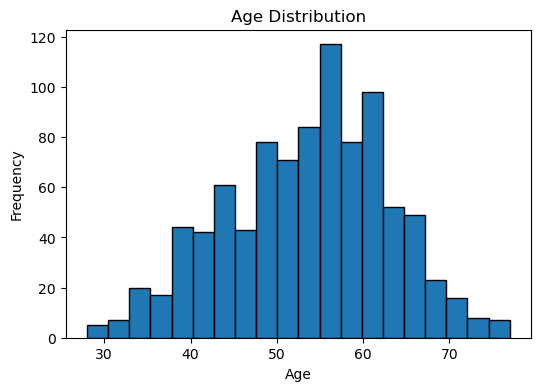

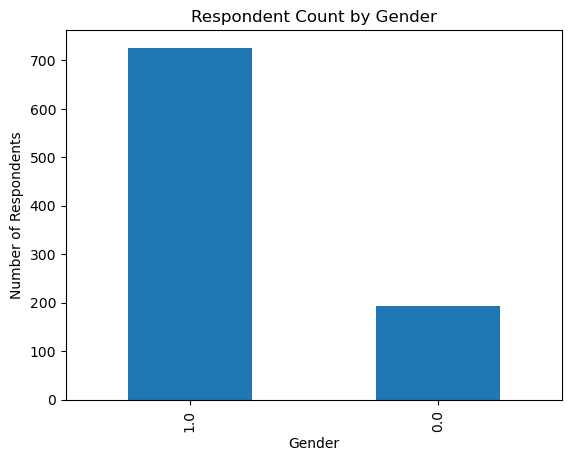

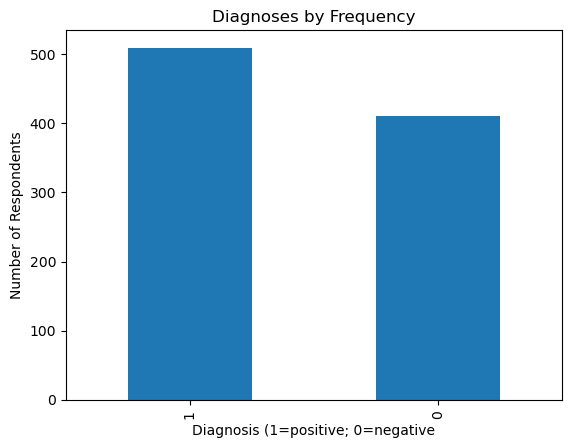

In [61]:
plt.figure(figsize=(6, 4))
plt.hist(merged['age'], bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Age Distribution')
plt.show()

counts = merged['sex'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.title('Respondent Count by Gender')
plt.show()

counts = merged['target'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Diagnosis (1=positive; 0=negative')
plt.ylabel('Number of Respondents')
plt.title('Diagnoses by Frequency')
plt.show()

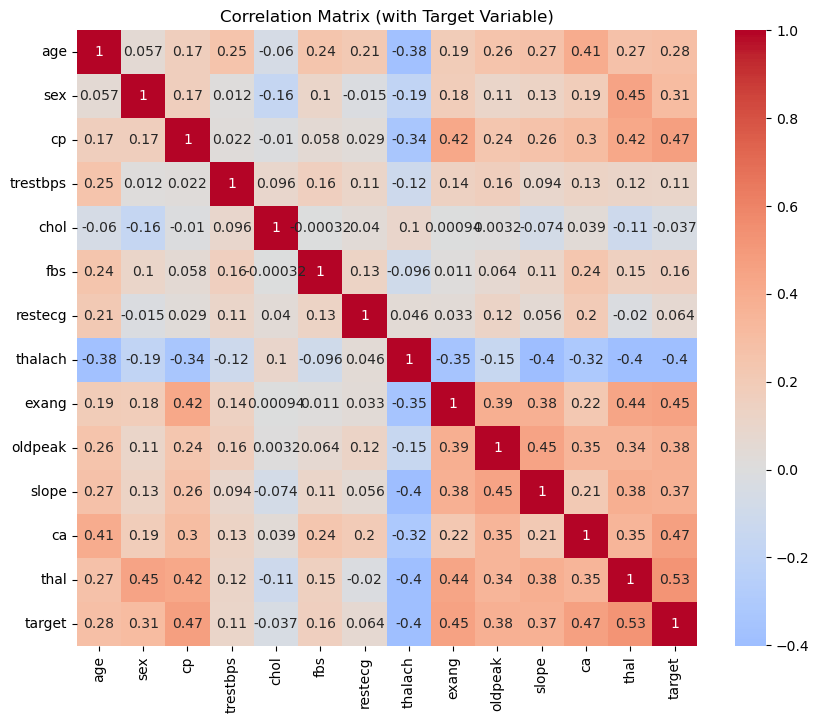

In [62]:
correlation_matrix = merged.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (with Target Variable)')
plt.show()

### Scale

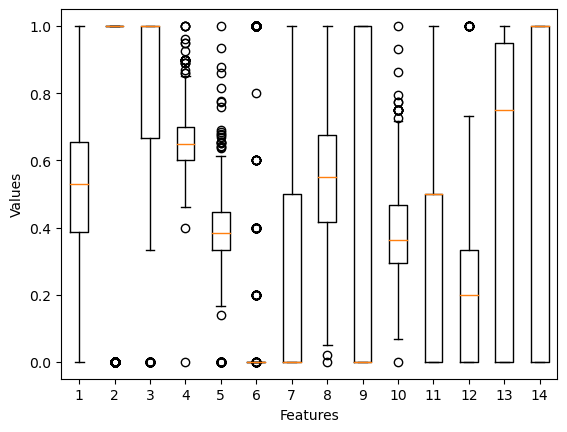

In [63]:
scaler = MinMaxScaler()

merged_scaled = pd.DataFrame(
    scaler.fit_transform(merged),
    columns=merged.columns,
    index=merged.index
)

plt.boxplot(merged_scaled)
plt.xlabel('Features')
plt.ylabel('Values')

merged = merged_scaled

In [64]:
X = merged.drop(columns='target')
y = merged['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

print("\nConfusion Matrix:")
print(cm_df)

Test accuracy: 0.79

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          117           40
Actual 1           39          172


In [65]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM (RBF)':               SVC(kernel='rbf', gamma='scale'),
    'MLPClassifier':           MLPClassifier(max_iter=500),
    'RandomForest':            RandomForestClassifier(n_estimators=100)
}

results = []
for name, clf in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model',  clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    results.append({
        'Model':    name,
        'Accuracy': f"{acc:.3f}",
        'TN':       tn,
        'FP':       fp,
        'FN':       fn,
        'TP':       tp})

results_df = pd.DataFrame(results)
print(results_df)

                Model Accuracy   TN  FP  FN   TP
0  LogisticRegression    0.812  122  35  34  177
1           SVM (RBF)    0.810  115  42  28  183
2       MLPClassifier    0.796  119  38  37  174
3        RandomForest    0.812  119  38  31  180


c:\Users\emats\miniconda3\envs\cse217a\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Upsample female records

In [66]:
major = merged[merged['sex']==1]
minor = merged[merged['sex']==0]

minor_up = resample(minor, replace=True, n_samples=len(major), random_state=42)
merged_fair = pd.concat([major, minor_up])

In [67]:
X = merged_fair.drop(columns='target')
y = merged_fair['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(
                   class_weight='balanced', 
                   solver='lbfgs',
                   max_iter=1000,
                   random_state=42))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.821

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       159
         1.0       0.81      0.80      0.80       132

    accuracy                           0.82       291
   macro avg       0.82      0.82      0.82       291
weighted avg       0.82      0.82      0.82       291



In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(class_weight='balanced',
                                  max_iter=1000,
                                  random_state=42))
])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')

print("Accuracy per fold: ", np.round(scores, 3))
print("Mean accuracy:    ", scores.mean().round(3))
print("Std dev:          ", scores.std().round(3))


Accuracy per fold:  [0.801 0.863 0.872 0.838 0.872]
Mean accuracy:     0.849
Std dev:           0.027


In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

print("\nConfusion Matrix:")
print(cm_df)

Test accuracy: 0.86

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          135           24
Actual 1           18          114


In [70]:

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM (RBF)':               SVC(kernel='rbf', gamma='scale'),
    'MLPClassifier':           MLPClassifier(max_iter=500),
    'RandomForest':            RandomForestClassifier(n_estimators=100)
}

results = []
for name, clf in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model',  clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    results.append({
        'Model':    name,
        'Accuracy': f"{acc:.3f}",
        'TN':       tn,
        'FP':       fp,
        'FN':       fn,
        'TP':       tp})

results_df = pd.DataFrame(results)
print(results_df)

c:\Users\emats\miniconda3\envs\cse217a\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                Model Accuracy   TN  FP  FN   TP
0  LogisticRegression    0.814  134  25  29  103
1           SVM (RBF)    0.842  132  27  19  113
2       MLPClassifier    0.852  137  22  21  111
3        RandomForest    0.890  141  18  14  118


In [71]:
pipe.fit(X_train, y_train)

probas = pipe.predict_proba(X_test)[:,1]
y_pred = (probas >= 0.2).astype(int)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

Confusion matrix:
 [[124  35]
 [  6 126]]

Report:
               precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       159
         1.0       0.78      0.95      0.86       132

    accuracy                           0.86       291
   macro avg       0.87      0.87      0.86       291
weighted avg       0.88      0.86      0.86       291



In [72]:
rf = RandomForestClassifier(
    n_estimators=100,     
    random_state=42,     
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.8900343642611683


In [73]:
pipe.fit(X_train, y_train)

probas = pipe.predict_proba(X_test)[:,1]
y_pred = (probas >= 0.2).astype(int)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

Confusion matrix:
 [[123  36]
 [  3 129]]

Report:
               precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       159
         1.0       0.78      0.98      0.87       132

    accuracy                           0.87       291
   macro avg       0.88      0.88      0.87       291
weighted avg       0.89      0.87      0.87       291

